# Gráfico de barras
- Outra modalidade de plot é o gráfico de barras
- Como o nome sugere, ele serve pra fazer gráficos em formato de barras
    - [Documentação](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [303]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- **Carregando os mesmos dados usados no notebook anterior:**

In [304]:
df = pd.read_csv("assets/salesman_pivot.csv")
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

## Criando plots
- Primeiro vamos plotar apenas os dados de `bob`

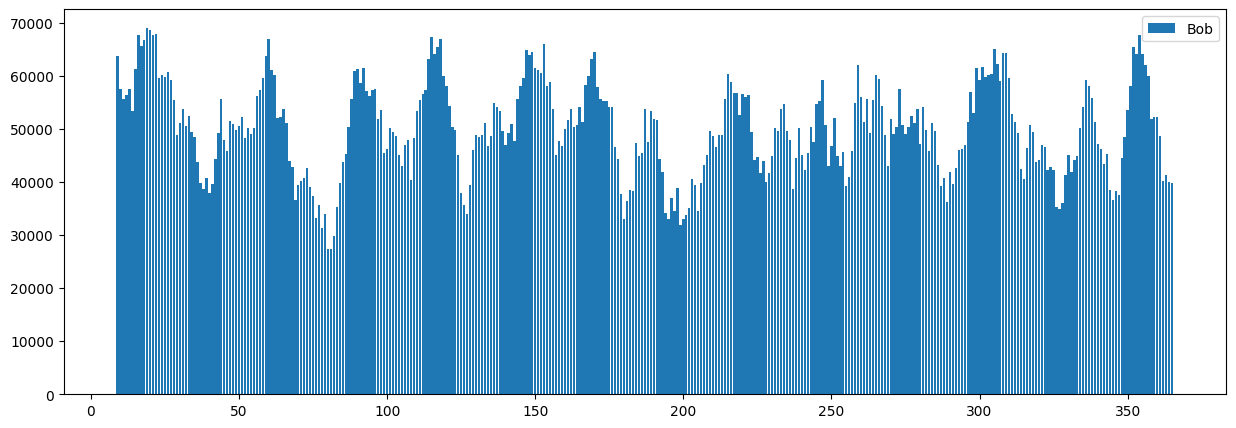

In [305]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.bar(days, bob, label='Bob')
ax.legend()

- Como são muitos dias, vamos focar nos 10 primeiros

In [306]:
bob = bob[0:10]
dave = dave[0:10]
days = days[0:10]

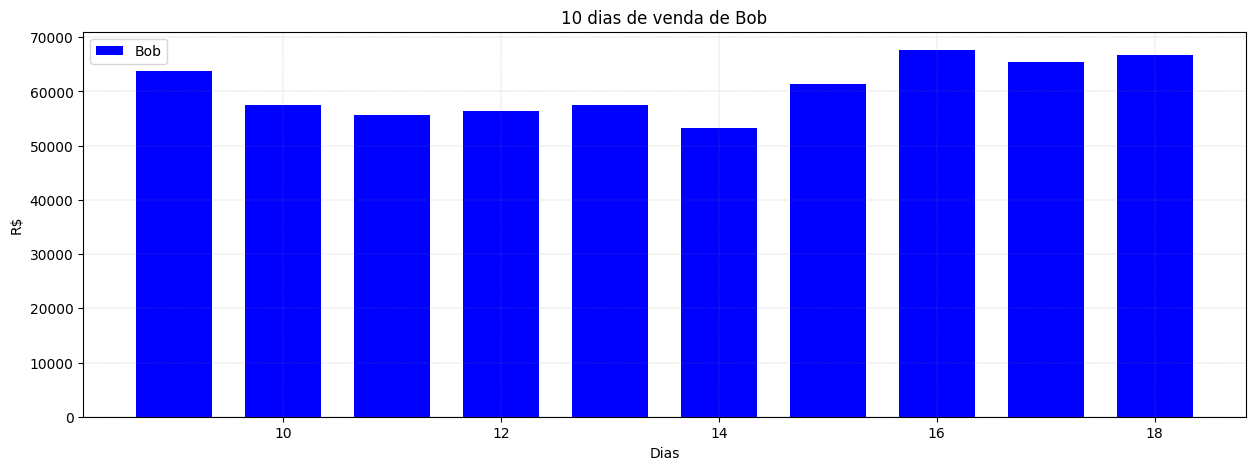

In [307]:
fig, ax = plt.subplots(figsize=(15,5))
days = bob.index
ax.bar(days, bob, label='Bob', color="b", width=0.7)
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
ax.legend()

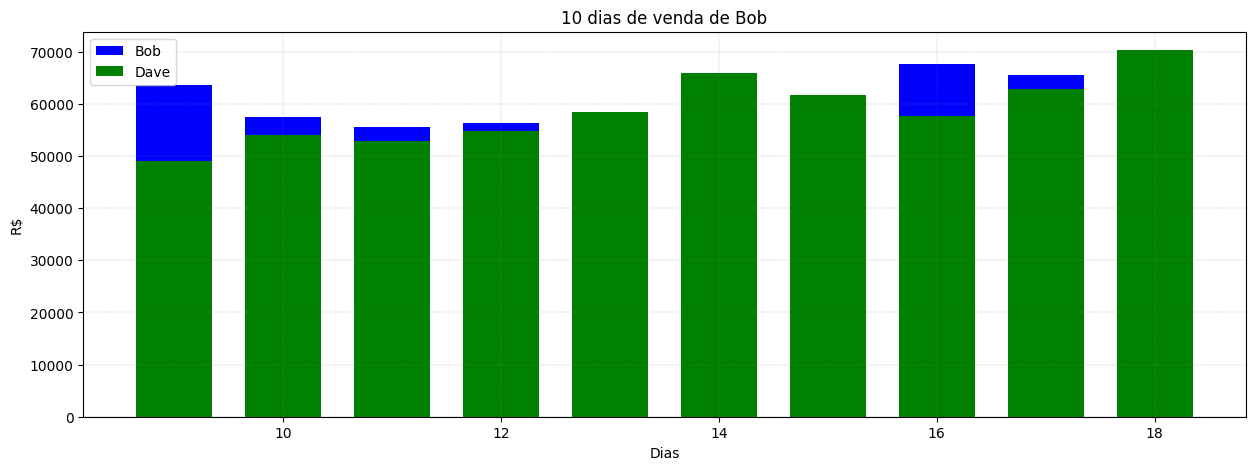

In [308]:
ax.bar(days, dave, label='Dave', color="g", width=0.7)
ax.legend()
fig

- Podemos melhorar esse plot da seguinte forma:

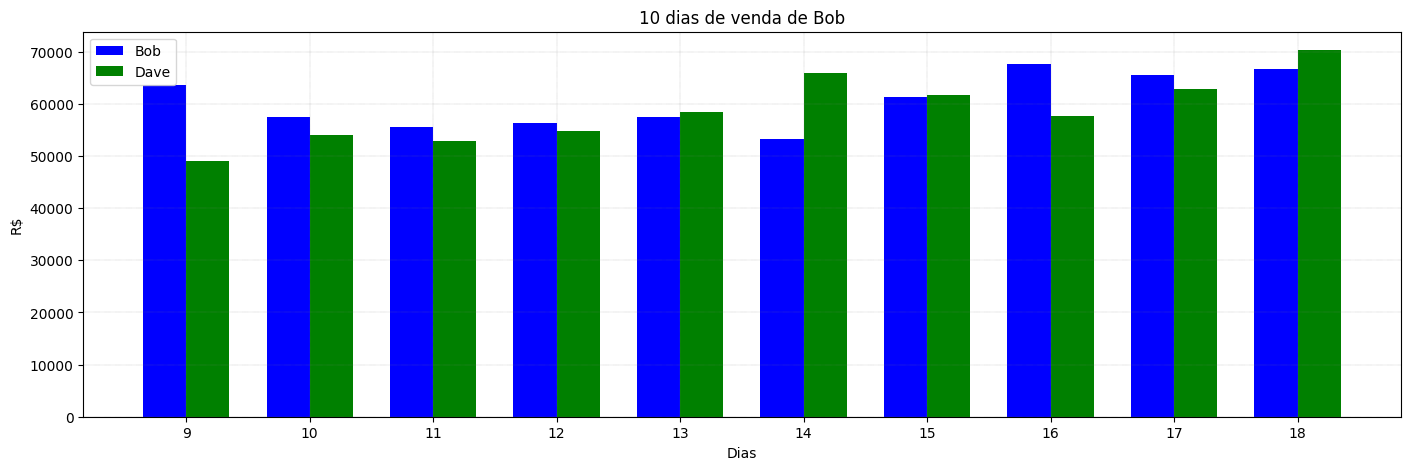

In [309]:
fig, ax = plt.subplots(figsize=(17,5))
days = bob.index
width = 0.35
sp = 0.5
ax.bar(days - (width/2), bob, label='Bob', color="b", width=width)
ax.bar(days + (width/2), dave, label='Dave', color="g", width=width)
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set(title="10 dias de venda de Bob", xlabel="Dias", ylabel="R$")
ax.set_xticks(days)
ax.legend()

- Colocando uma linha para representar a média

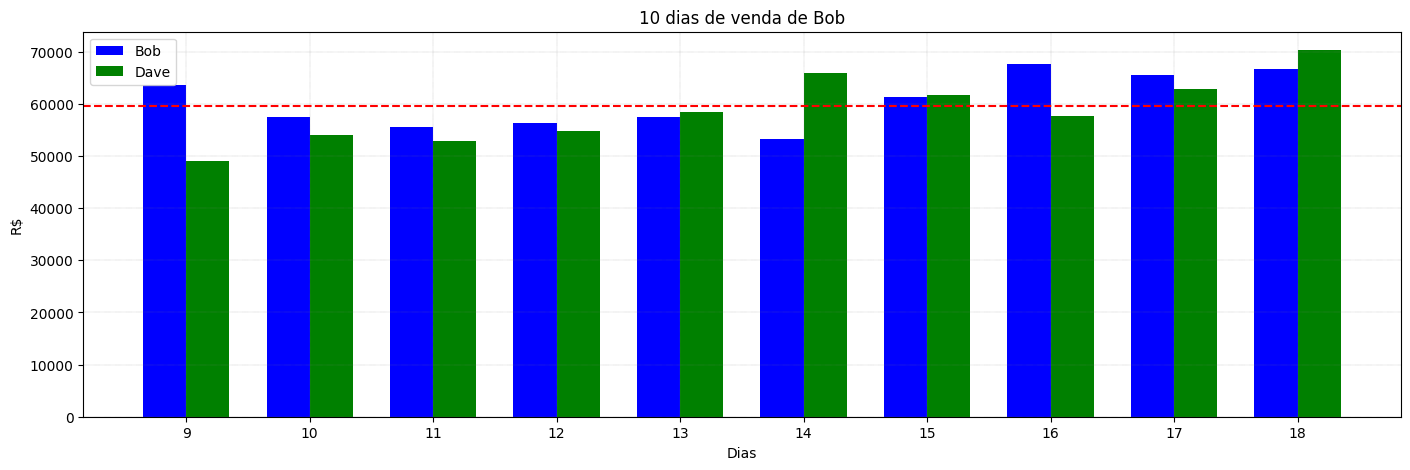

In [310]:
avg = (np.mean(bob) + np.mean(dave)) / 2
ax.axhline(avg, color='red', ls='dashed') 
fig

___
## Exercício 4: 
- Coloque uma anotação indicando que a reta vermelhar é a média de todos os valores
___

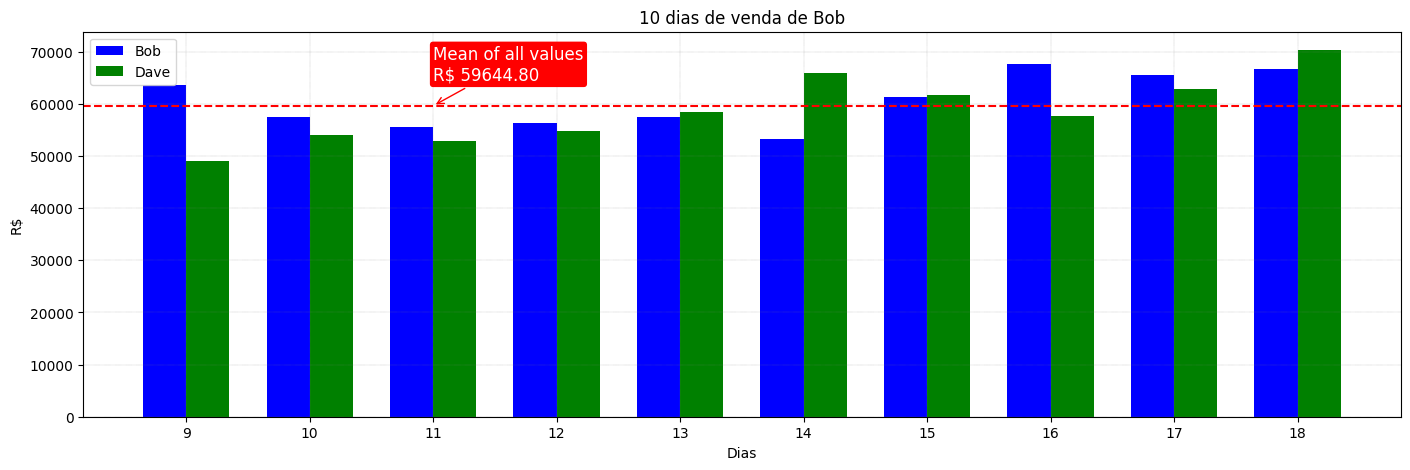

In [311]:
mean_annotate = ax.annotate(f"Mean of all values\nR$ {avg:.2f}",
                            xy=(11, avg),
                            xytext=(11, avg+5000),
                            arrowprops=dict(arrowstyle='->', color='red')
                            )

mean_annotate.set(size=12, color='white')
mean_annotate.set_bbox(dict(facecolor='red', boxstyle='round, pad=0.2', lw=0))

fig

- Como já vimos na anatomia, o plot de barras é incluido no atributo `patches`
- Vamos manipular ele para incluir o valor da barra no plot

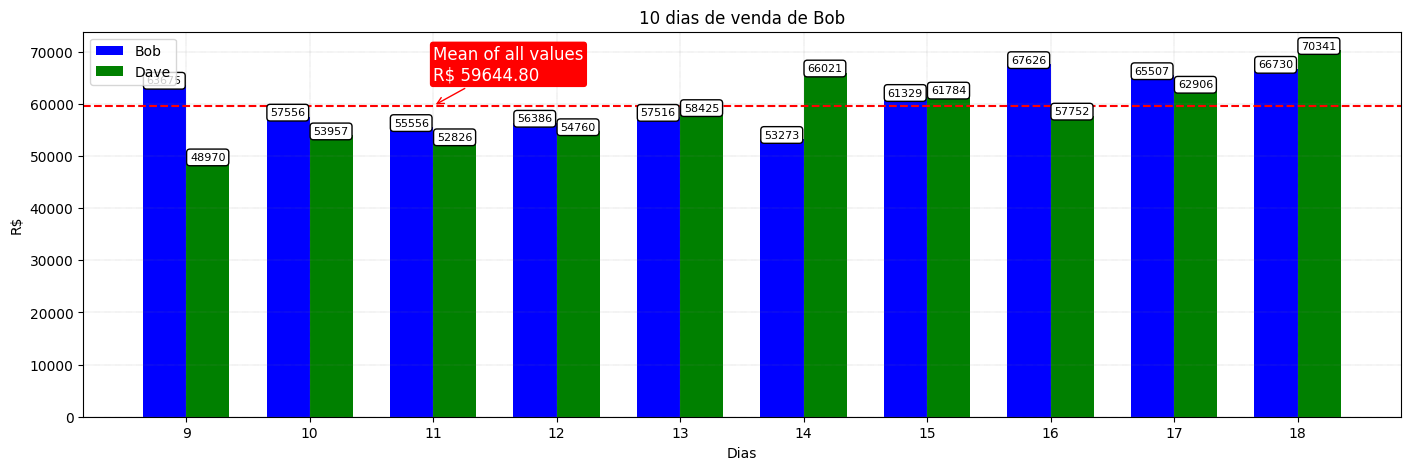

In [312]:
for p in ax.patches:
    an = ax.annotate(str(int(p.get_height())), (p.get_x()+0.03, p.get_height()+200))
    an.set_size(8)
    an.set_bbox(dict(facecolor='white', boxstyle='round',lw=1, edgecolor='k'))
fig

___
## Exercício 5: 
- Replique o plot anterior mas fazendo um subplot para cada vendedor

```
-------------------------
|         Bob           |
-------------------------
-------------------------
|         Dave          |
-------------------------
```
___

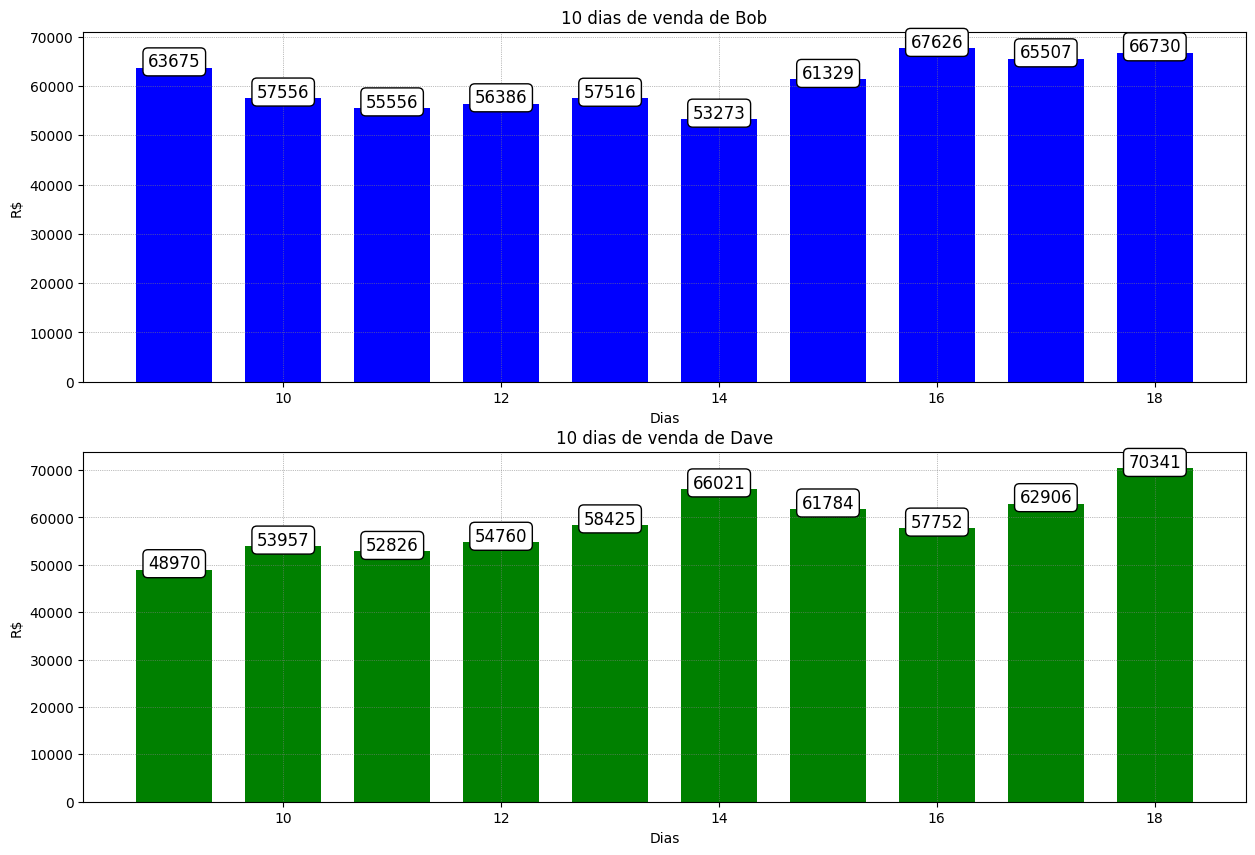

In [313]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10))
days = bob.index
ax[0].bar(days, bob, label='Bob', color='blue', width=0.7)
ax[0].grid(True, color='gray', linestyle='dotted', linewidth=0.5)
ax[0].set(
    title='10 dias de venda de Bob',
    xlabel='Dias',
    ylabel='R$'
)

for p in ax[0].patches:
    an = ax[0].annotate(str(int(p.get_height())), (p.get_x()+0.11, p.get_height()+200))
    an.set_size(12)
    an.set_bbox(dict(facecolor='white', boxstyle='round',lw=1, edgecolor='k'))

ax[1].bar(days, dave, label='Dave', color='green', width=0.7)
ax[1].grid(True, color='gray', linestyle='dotted', linewidth=0.5)
ax[1].set(
    title='10 dias de venda de Dave',
    xlabel='Dias',
    ylabel='R$'
)

for p in ax[1].patches:
    an = ax[1].annotate(str(int(p.get_height())), (p.get_x()+0.11, p.get_height()+200))
    an.set_size(12)
    an.set_bbox(dict(facecolor='white', boxstyle='round',lw=1, edgecolor='k'))